In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
from scipy.ndimage import median_filter
import pywt
import seaborn as sns
import warnings as wr
wr.filterwarnings('ignore')


In [17]:
data = pd.read_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\motor_data2.csv")
# data.iloc[:,:-3]
# print(data.head(5))
print(data.columns)
columns_to_drop = ['0.00', '0.00', '0.00.1','100']
data = data.drop(columns=columns_to_drop, errors='ignore')
print(data.head())
data.to_csv(r"C:\Users\Dan Ovidiu\PycharmProjects\firstProject\ProjectExcels\motor_data2_updated.csv")

Index(['Time', 'Speed Left', 'Speed Right', 'PWM0.10', '0.00', '0.00.1',
       '100'],
      dtype='object')
   Time  Speed Left  Speed Right  PWM0.10
0   0.2         0.0          0.0      100
1   0.3         0.0          0.0      100
2   0.4         0.0          0.0      100
3   0.5         0.0          0.0      100
4   0.6         0.0          0.0      100


In [20]:
data.shape
# data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 644 entries, 0 to 643
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Time         644 non-null    float64
 1   Speed Left   644 non-null    float64
 2   Speed Right  644 non-null    float64
 3   PWM0.10      644 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 20.3 KB


,Time,Speed Left,Speed Right,PWM0.10
count,644.000000,644.000000,644.000000,644.000000
mean,32.350000,2.155450,1.889332,146.583851
std,18.605107,1.467413,1.324206,41.407666
min,0.200000,0.000000,0.000000,100.000000
25%,16.275000,0.000000,0.000000,100.000000
50%,32.350000,2.650000,2.350000,150.000000
75%,48.425000,3.060000,2.760000,200.000000
max,64.500000,15.720000,14.290000,200.000000


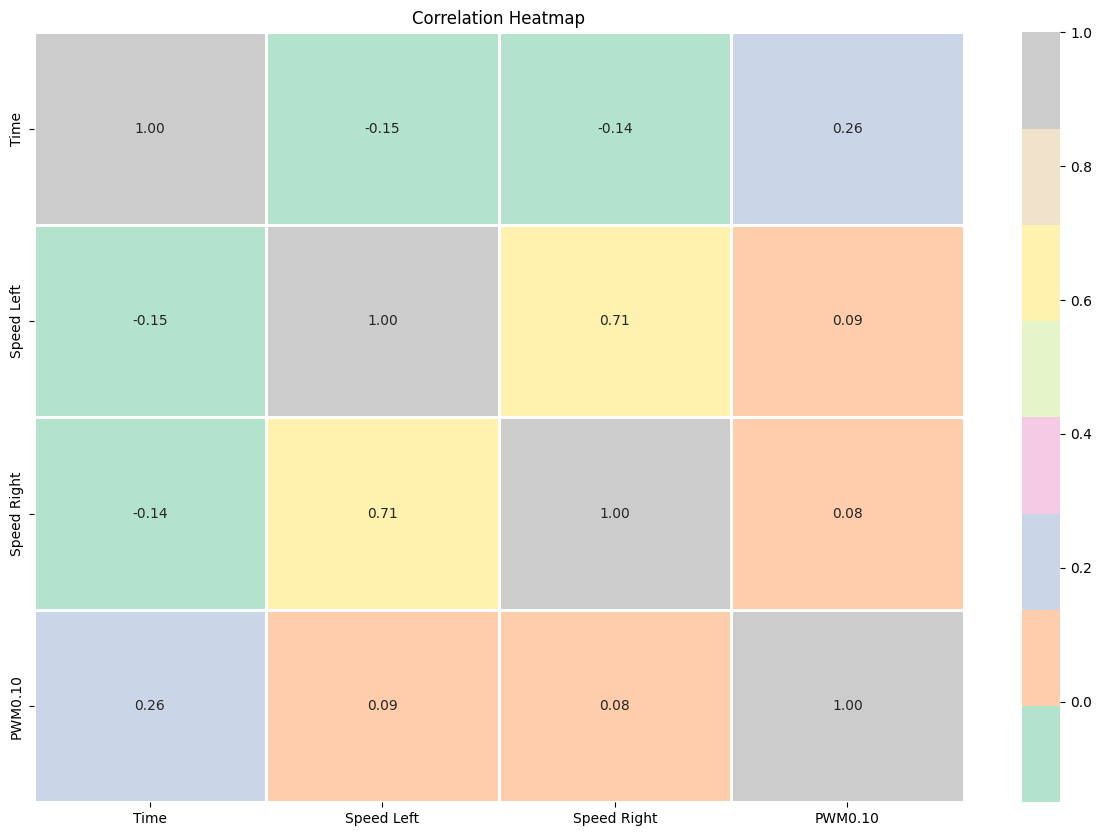

In [24]:
# Assuming 'df' is your DataFrame
plt.figure(figsize=(15, 10))
# Using Seaborn to create a heatmap
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)
plt.title('Correlation Heatmap')
plt.show()


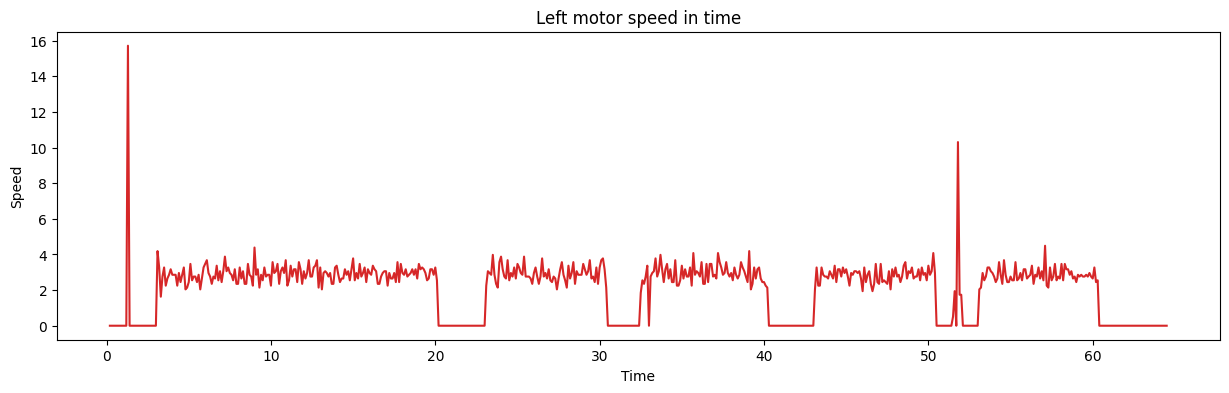

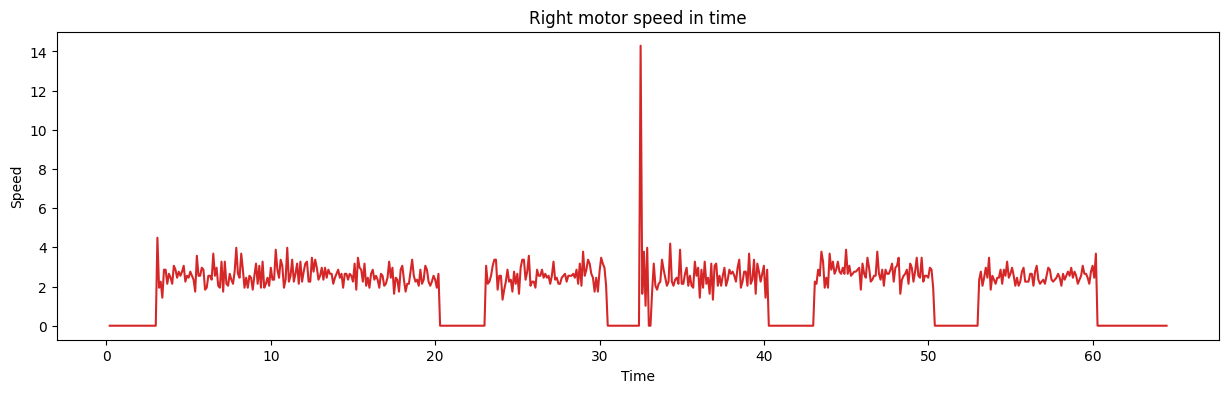

In [37]:
def plot_df(data, x, y, title="", xlabel='Time', ylabel='Speed', dpi=100):
 plt.figure(figsize=(15,4), dpi=dpi)
 plt.plot(x, y, color='tab:red')
 plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
 plt.show()

plot_df(data, x=data['Time'], y=data['Speed Left'], title='Left motor speed in time')
plot_df(data, x=data['Time'], y=data['Speed Right'], title='Right motor speed in time')



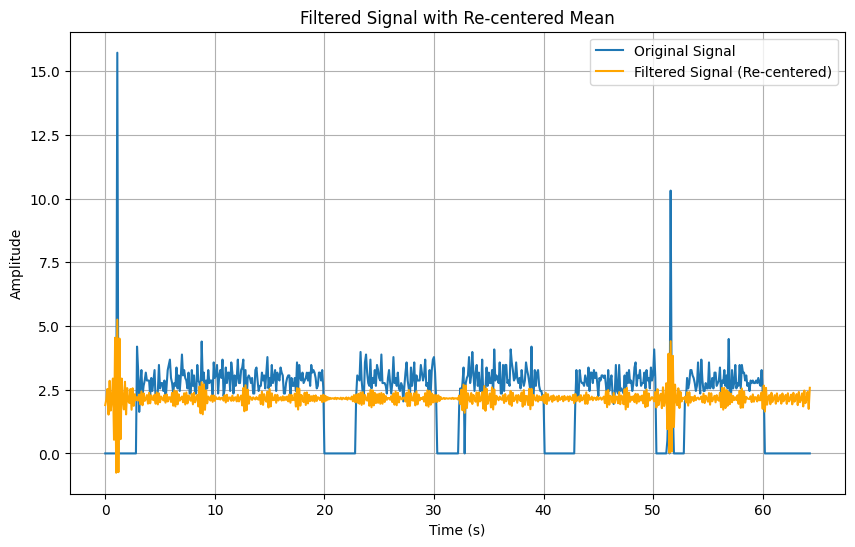

In [54]:
from numpy.fft import fft, ifft, fftfreq

# Perform FFT on the 'Speed Left' column
X = fft(data['Speed Left'])
N = len(X)
n = np.arange(N)
sr = 10  # Sampling rate (Hz)
T = N / sr  # Duration in seconds

# Define the frequencies corresponding to FFT
freq = fftfreq(N, d=1./sr)

# Define the cutoff frequency for the high-pass filter
cut_off = 4 # Cut-off frequency in Hz

# Apply the high-pass filter
X_filtered = X.copy()
X_filtered[np.abs(freq) < cut_off] = 0

original_mean = np.mean(data['Speed Left'])
# Inverse FFT to get the filtered signal in the time domain
filtered_signal  = ifft(X_filtered).real

# Re-center the signal to match the original mean value
filtered_signal += original_mean

# Plot the corrected signal
plt.figure(figsize=(10, 6))
plt.plot(t, data['Speed Left'], label="Original Signal")
plt.plot(t, filtered_signal, label="Filtered Signal", color='orange')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Filtered Signal")
plt.legend()
plt.grid()
plt.show()


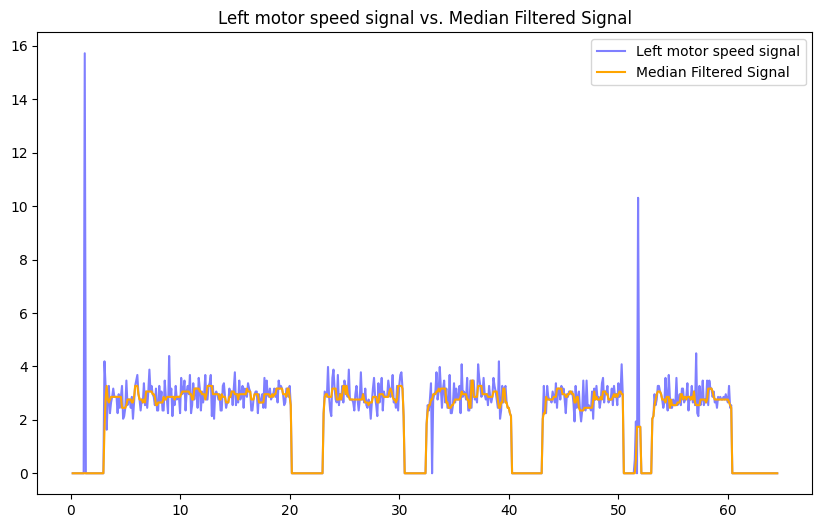

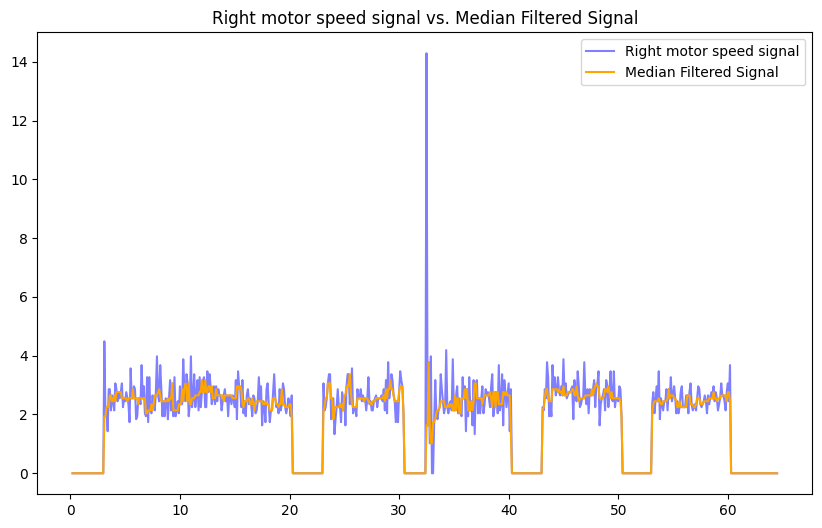

In [61]:
def apply_median_filter(data,signal,label,size=5): 
    filtered_data = median_filter(data, size=size) 


    plt.figure(figsize=(10, 6)) 
    plt.plot(time, signal, label=label, color='blue', alpha=0.5) 
    plt.plot(time, filtered_data, label='Median Filtered Signal', color='orange') 
    plt.title(label + ' vs. Median Filtered Signal') 
    plt.legend() 
    plt.show() 
    return filtered_data 

# sampling_rate = 10 # Hz, assuming EEG is sampled at 256 Hz
# cutoff = 40
speedLeftSignal = data['Speed Left'].values
speedRightSignal = data['Speed Right'].values
median_filtered_left=apply_median_filter(speedLeftSignal,speedLeftSignal,'Left motor speed signal')
median_filtered_right=apply_median_filter(speedRightSignal,speedRightSignal,'Right motor speed signal')

In [65]:
# median_filtered_left.to_csv(r"C:\Users\Dan Ovidiu\OneDrive - Technical University of Cluj-Napoca\Desktop\Proiect SBC\15 - Smart Warehouse Inventory Management System\ProiectSBC")
import scipy.io
scipy.io.savemat('SpeedLeft.mat',{'left':median_filtered_left})
scipy.io.savemat('SpeedRight.mat',{'right':median_filtered_right})